In [ ]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [ ]:
nitromethane = Chem.MolFromSmiles("C[N+](=O)[O-]")

In [ ]:
nitromethane

In [ ]:
nitromethane = Chem.MolFromSmiles("CN(=O)->O")

As expected, there is no implicit H on the O atom:

In [ ]:
nitromethane

The attempt to generate the charge-separated analog with an implicit H on the oxygen fails, as expected:

In [ ]:
nitromethane = Chem.MolFromSmiles("C[N+](=O)-[OH-]")

In [ ]:
mol = Chem.MolFromSmiles("N(C)(C)(C)(->O)->O", sanitize=False)

In [ ]:
mol

The molecule has no implicit Hs on the oxygen, and raises an exception with `strict=True`, because a nitrogen atom does not have enough LP to establish two double bonds:

In [ ]:
mol.UpdatePropertyCache(False)

In [ ]:
mol.UpdatePropertyCache(True)

In [ ]:
Chem.MolToSmiles(mol)

The charge-separated version of the above fails sanitization, as expected:

In [ ]:
mol = Chem.MolFromSmiles("[N+2](C)(C)(C)(-[O-])-[O-]", sanitize=False)

In [ ]:
mol

In [ ]:
mol.UpdatePropertyCache(False)

In [ ]:
mol.UpdatePropertyCache(True)

In [ ]:
Chem.MolFromMolBlock((Chem.MolToV3KMolBlock(mol)), sanitize=False)

Also aromatic _N_-oxides correctly have no implicit Hs on oxygen:

In [ ]:
pyridine_N_oxide = Chem.MolFromSmiles("c1ccccn1->O")

In [ ]:
pyridine_N_oxide

The nitrogen analogue has a single implicit hydrogen, as expected:

In [ ]:
mol = Chem.MolFromSmiles("N(C)(C)(C)->N")

In [ ]:
mol

Its charge separated version is correct:

In [ ]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[NH-]")

In [ ]:
mol

And it correctly fails when trying to add another implicit H:

In [ ]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[NH2-]")

In [ ]:
mol = Chem.MolFromSmiles("N(C)(C)(C)->O<-N(C)(C)C", False)

This molecule should raise an exception with `strict=True`, because oxygen cannot expand its octet, and it indeed does:

In [ ]:
mol

In [ ]:
Chem.SanitizeMol(mol)

As expected, sanitization fail also when written with charge separation, since that implies again 10 electrons on oxygen:

In [ ]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[O-2]-[N+](C)(C)C", False)

In [ ]:
mol

In [ ]:
Chem.SanitizeMol(mol)

In [ ]:
mol

It also correctly fails when written with a single charge, which implies 9 electrons on oxygen:

In [ ]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[O-]-[N+](C)(C)C", False)

In [ ]:
mol

In [ ]:
Chem.SanitizeMol(mol)

In [ ]:
mol = Chem.MolFromSmiles("N(C)(C)(C)->S<-N(C)(C)C", False)

This molecule can expand its octet, so it should not raise an exception:

In [ ]:
mol

In [ ]:
Chem.SanitizeMol(mol)

Also the version written with charge separation should not cause any problems:

In [ ]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[S-2]-[N+](C)(C)C", False)

In [ ]:
mol

In [ ]:
Chem.SanitizeMol(mol)

In [ ]:
mol

Correctly, it does not cause problems also when written with a single negative charge:

In [ ]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[S-]-[N+](C)(C)C", False)

In [ ]:
mol

In [ ]:
Chem.SanitizeMol(mol)

In [ ]:
mol

This molecule can formally establish two dative bonds, and correctly it does not bear any implicit Hs on either nitrogen or oxygen:

In [ ]:
mol = Chem.MolFromSmiles("CN(->O)->O")

In [ ]:
mol

In [ ]:
Chem.MolToSmiles(mol)

Its charge-separated version is indeed correct:

In [ ]:
mol = Chem.MolFromSmiles("C[N+2](-[O-])-[O-]")

In [ ]:
mol

And it correctly fails sanitization when attempting to add two hydrogens:

In [ ]:
mol = Chem.MolFromSmiles("C[NH2+2](-[O-])-[O-]")

Dimethylsulfone represented with dative bonds should not bear implicit Hs on the oxygen atoms, and indeed it does not:

In [ ]:
mol = Chem.MolFromSmiles("CS(->O)(->O)C")

In [ ]:
mol

In [ ]:
nh3_bh3_charge_sep_from_smiles = Chem.MolFromSmiles("[BH3-]-[NH3+]")

In [ ]:
nh3_bh3_charge_sep_from_smiles

This is the same molecule represented with a dative bond rather than with charge separation, and boron has 3 implicit hydrogens as expected:

In [ ]:
nh3_bh3_dative_from_smiles = Chem.MolFromSmiles("B<-N")

In [ ]:
nh3_bh3_dative_from_smiles

In [ ]:
nh3_bh3_dative_from_molblock = Chem.MolFromMolBlock("""
  Mrv1902 08122409262D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 2 1 0 0 0
M  V30 BEGIN ATOM
M  V30 1 B -1.3333 1.2917 0 0
M  V30 2 N 0.5833 1.2917 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 9 2 1
M  V30 END BOND
M  V30 END CTAB
M  END
""")

In [ ]:
nh3_bh3_dative_from_molblock

This is an example from https://github.com/rdkit/rdkit/issues/3359

I can generate boron trifluoride diethyl etherate with charge separation...

In [ ]:
mol = Chem.MolFromSmiles("F[B-](F)(F)-[O+](CC)CC")

In [ ]:
mol

...and the attempt to generate it with a dative bond does not fail sanitization, as expected:

In [ ]:
mol = Chem.MolFromSmiles("FB(F)(F)<-O(CC)CC", sanitize=False)

In [ ]:
mol

In [ ]:
Chem.SanitizeMol(mol)

Similarly, I can generate the isoelectronic species with carbon using charge separation...

In [ ]:
mol = Chem.MolFromSmiles("FC(F)(F)-[O+](CC)CC")

In [ ]:
mol

...and the attempt to sanitize it with a dative bond does not fail, as expected:

In [ ]:
mol = Chem.MolFromSmiles('F[C+](F)(F)<-O(C)C', sanitize=False)

In [ ]:
mol

In [ ]:
Chem.SanitizeMol(mol)

ChemDraw is almost always right when flagging or not flagging chemical mistakes on dative bonds; it only fails with the double dative bond to sulfur (which is a very much forged case, to be honest):

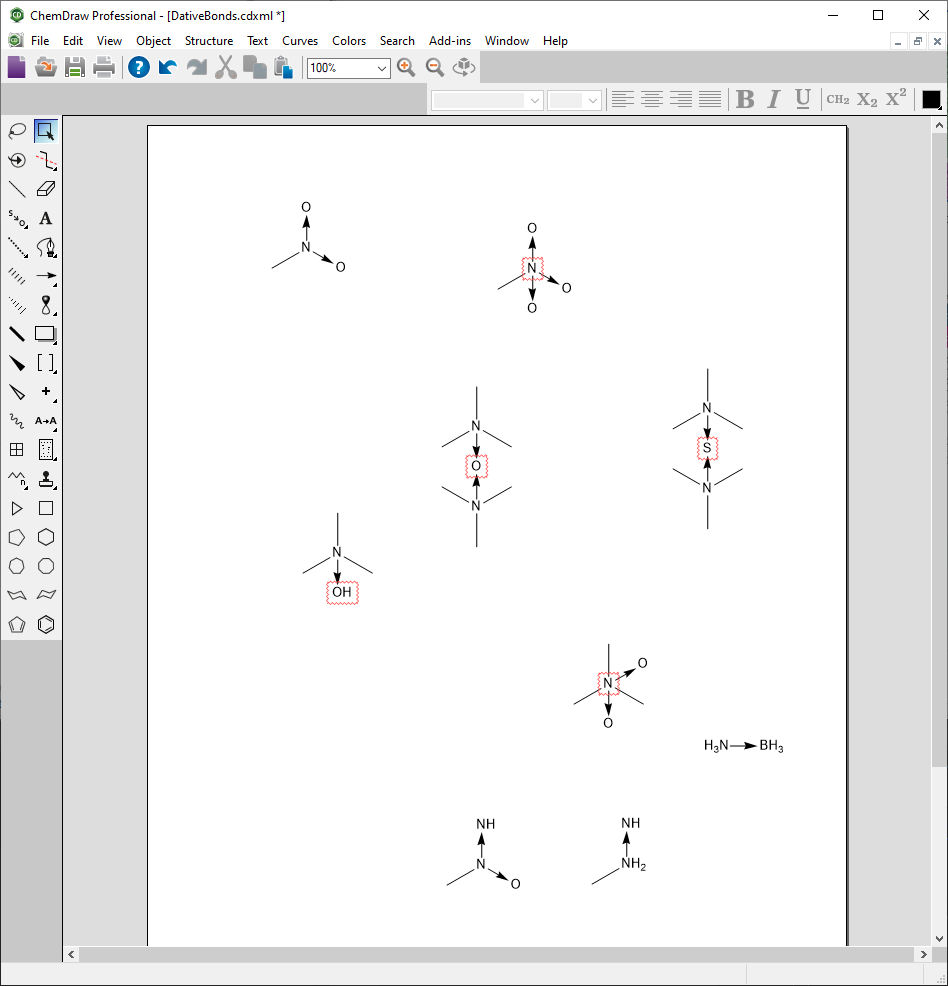

In [ ]:
smilesps = Chem.SmilesParserParams()
smilesps.removeHs = False
mol = Chem.MolFromSmiles("[H-].[OH+]", smilesps)

In [ ]:
mol

In [ ]:
mol = Chem.MolFromSmiles("[H-].[OH+]")

In [ ]:
mol

In [ ]:
mol = Chem.MolFromSmiles("[H-]->[OH+]", smilesps)

In [ ]:
mol

In [ ]:
mol.GetAtomWithIdx(1).GetNumRadicalElectrons()

In [ ]:
ps = Chem.RemoveHsParameters()

In [ ]:
ps.removeHydrides = True

In [ ]:
mol_no_h = Chem.RemoveHs(mol, ps)

In [ ]:
mol_no_h.GetNumAtoms()

In [ ]:
Chem.GetFormalCharge(mol_no_h)

In [ ]:
mol_no_h

In [ ]:
mol_no_h.GetAtomWithIdx(0).GetNumRadicalElectrons()

In [ ]:
mol = Chem.MolFromSmiles("[Fe+2]<-[H-]", smilesps)

In [ ]:
mol

In [ ]:
ps.removeHydrides = True

In [ ]:
mol_no_h = Chem.RemoveHs(mol, ps)

In [ ]:
Chem.GetFormalCharge(mol_no_h)

In [ ]:
mol_no_h

In [ ]:
smilesps = Chem.SmilesParserParams()
smilesps.sanitize = False
mol = Chem.MolFromSmiles("[H-][OH+]", smilesps)

In [ ]:
mol

In [ ]:
mol = Chem.MolFromSmiles("[2HH2-]", smilesps)

In [ ]:
mol

In [ ]:
Chem.MolToSmiles(mol)

In [ ]:
mb = """
     RDKit          2D

  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 7 0 0 0
M  V30 BEGIN ATOM
M  V30 1 O -0.000000 5.505314 0.000000 0
M  V30 2 N -0.000000 4.008578 0.000000 0 CHG=2
M  V30 3 C 0.000000 0.999538 0.000000 0
M  V30 4 C -1.298419 3.248684 0.000000 0
M  V30 5 C 1.298419 3.248684 0.000000 0
M  V30 6 C -1.298419 1.744164 0.000000 0
M  V30 7 C 1.298419 1.744164 0.000000 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 4
M  V30 3 1 2 5
M  V30 4 1 3 6
M  V30 5 1 3 7
M  V30 6 1 4 6
M  V30 7 1 5 7
M  V30 END BOND
M  V30 END CTAB
M  END
$$$$
"""
m = Chem.MolFromMolBlock(mb)

In [ ]:
m

In [ ]:
m.Debug()

# The +2 charge on the N atom is completely bogus:
# Atoms:
#      0 8 O chg: 0  deg: 1 exp: 1 imp: 1 hyb: SP3
#      1 7 N chg: 2  deg: 3 exp: 3 imp: 0 hyb: SP2
#      2 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
#      3 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
#      4 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
#      5 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
#      6 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
# Bonds:
#      0 0->1 order: 1
#      1 1->3 order: 1
#      2 1->4 order: 1
#      3 2->5 order: 1
#      4 2->6 order: 1
#      5 3->5 order: 1
#      6 4->6 order: 1

In [ ]:
uncharger = rdMolStandardize.Uncharger(canonicalOrder=True)
uncharger.uncharge(m)

In [ ]:
mol = Chem.MolFromSmiles("[Cu+]->N")

In [ ]:
mol

In [ ]:
mol.GetAtomWithIdx(1).GetTotalValence()

In [ ]:
Chem.MolToSmiles(mol)

In [ ]:
mol = Chem.MolFromSmiles("[Cu+]->B")

In [ ]:
mol

In [ ]:
mol.GetAtomWithIdx(1).GetTotalValence()

In [ ]:
Chem.MolToSmiles(mol)

In [ ]:
mol = Chem.MolFromSmiles("CN(->[Li+])C")

In [ ]:
mol

In [ ]:
mb = """
  SMMXDraw08051113052D

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 8 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 Cl 11.5252 -12.6451 0.0000 0
M  V30 2 Al 12.7063 -12.6451 0.0000 0
M  V30 3 Cl 12.7063 -11.4640 0.0000 0
M  V30 4 Cl 12.7063 -13.8979 0.0000 0
M  V30 5 Al 14.7407 -13.8979 0.0000 0
M  V30 6 Cl 14.7407 -12.6451 0.0000 0
M  V30 7 Cl 15.9218 -13.8979 0.0000 0
M  V30 8 Cl 14.7407 -15.0790 0.0000 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 2 3 
M  V30 2 1 5 6 
M  V30 3 1 1 2 
M  V30 4 1 5 7 
M  V30 5 1 2 4 
M  V30 6 1 5 8 
M  V30 7 9 6 2 
M  V30 8 9 4 5 
M  V30 END BOND
M  V30 END CTAB
M  END
"""

In [ ]:
m = Chem.MolFromMolBlock(mb, sanitize=False)

In [ ]:
m

In [ ]:
mol = Chem.MolFromSmiles("N->B")

In [ ]:
mol

In [ ]:
mol.Debug()

In [ ]:
mol = Chem.MolFromSmiles("N->O")

In [ ]:
mol

In [ ]:
mol.Debug()

In [ ]:
for a in mol.GetAtoms():
    print(f"{a.GetIdx()} {a.GetSymbol()} exp {a.GetExplicitValence()} imp {a.GetImplicitValence()} don {a.GetNumDonatedElectrons()}")

In [ ]:
mol = Chem.MolFromSmiles("CS(=O)(=O)C")

In [ ]:
mol.Debug()

In [ ]:
mol = Chem.MolFromSmiles("CS(->O)(->O)C")

In [ ]:
mol.Debug()